# ML - Classification exercise with SCADA data
## 1 Introduction
In this exercise, the aim is to train the use of classification and clustering algorithms on wind turbine SCADA data. As part of this exercises we will also get an overview of the needs for filtering and processing SCADA data which typically contains lots of invalid and noisy data entries.



## 2 Implementation

### 2.1 Data import and filtering
Let us begin with importing the necessary libraries, and loading the data. We will make use of the Pandas data frames, and therefore need the Pandas package.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
InputData = pd.read_csv('.\Datasets\DataScienceCourse_EDPdata.csv',delimiter = ';')
InputData.head() # Show the first few rows of the data

Turbine_ID                  Timestamp  Gen_RPM_Max  Gen_RPM_Min  \
0        T01  2016-01-02T10:10:00+00:00        258.3        120.3   
1        T11  2016-01-02T10:20:00+00:00        282.3        221.0   
2        T11  2016-01-02T10:30:00+00:00       1391.5        242.8   
3        T09  2016-01-02T10:30:00+00:00       1398.4        231.2   
4        T01  2016-01-02T10:30:00+00:00       1428.7        217.3   

   Gen_RPM_Avg  Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
0        195.4         41.4               30.0                   33   
1        248.8         17.0               28.0                   33   
2        582.2        444.5               28.0                   33   
3        735.4        496.5               28.0                   33   
4        927.5        463.3               30.0                   34   

   Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  ...  Grd_Prod_PsbleInd_Max  \
0                   34                   33  ...                    0.0   
1                   33                   33  ...                    0.0   
2                   33                   33  ...                    0.0   
3                   33                   33  ...                    0.0   
4                   34                   34  ...                    0.0   

   Grd_Prod_PsbleInd_Min  Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                 -992.0                  158.7                   40.6   
3                -1000.0                  341.3                  167.1   
4                -1000.0                  306.6                  336.9   

   Grd_Prod_PsbleCap_Max  Grd_Prod_PsbleCap_Min  Grd_Prod_PsbleCap_Std  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                  992.0                    0.0                  158.7   
3                 1000.0                    0.0                  341.3   
4                 1000.0                    0.0                  306.6   

   Gen_Bear2_Temp_Avg  Nac_Direction_Avg  Status_Flag  
0                  28               15.5          2.0  
1                  28              335.2          2.0  
2                  28              346.4          1.0  
3                  27                0.1          1.0  
4                  28              348.2          1.0  

[5 rows x 84 columns]

In [3]:
InputData.Timestamp.values

array(['2016-01-02T10:10:00+00:00', '2016-01-02T10:20:00+00:00',
       '2016-01-02T10:30:00+00:00', ..., '2017-08-23T09:30:00+00:00',
       '2017-08-23T09:40:00+00:00', '2017-08-23T09:40:00+00:00'],
      dtype=object)

The timestamp data type looks correct but it is stored as strings rather than date variables - let us convert it to a datetime format, which is very useful as it allows directly to index data temporally:

In [4]:
InputData.Timestamp = pd.to_datetime(InputData.Timestamp)

In [5]:
InputData.Timestamp.values

array(['2016-01-02T10:10:00.000000000', '2016-01-02T10:20:00.000000000',
       '2016-01-02T10:30:00.000000000', ...,
       '2017-08-23T09:30:00.000000000', '2017-08-23T09:40:00.000000000',
       '2017-08-23T09:40:00.000000000'], dtype='datetime64[ns]')

In [6]:
InputData.head()

Turbine_ID                 Timestamp  Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
0        T01 2016-01-02 10:10:00+00:00        258.3        120.3        195.4   
1        T11 2016-01-02 10:20:00+00:00        282.3        221.0        248.8   
2        T11 2016-01-02 10:30:00+00:00       1391.5        242.8        582.2   
3        T09 2016-01-02 10:30:00+00:00       1398.4        231.2        735.4   
4        T01 2016-01-02 10:30:00+00:00       1428.7        217.3        927.5   

   Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  Gen_Phase2_Temp_Avg  \
0         41.4               30.0                   33                   34   
1         17.0               28.0                   33                   33   
2        444.5               28.0                   33                   33   
3        496.5               28.0                   33                   33   
4        463.3               30.0                   34                   34   

   Gen_Phase3_Temp_Avg  ...  Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
0                   33  ...                    0.0                    0.0   
1                   33  ...                    0.0                    0.0   
2                   33  ...                    0.0                 -992.0   
3                   33  ...                    0.0                -1000.0   
4                   34  ...                    0.0                -1000.0   

   Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  Grd_Prod_PsbleCap_Max  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                  158.7                   40.6                  992.0   
3                  341.3                  167.1                 1000.0   
4                  306.6                  336.9                 1000.0   

   Grd_Prod_PsbleCap_Min  Grd_Prod_PsbleCap_Std  Gen_Bear2_Temp_Avg  \
0                    0.0                    0.0                  28   
1                    0.0                    0.0                  28   
2                    0.0                  158.7                  28   
3                    0.0                  341.3                  27   
4                    0.0                  306.6                  28   

   Nac_Direction_Avg  Status_Flag  
0               15.5          2.0  
1              335.2          2.0  
2              346.4          1.0  
3                0.1          1.0  
4              348.2          1.0  

[5 rows x 84 columns]

Now we can make use of the timestamp capability, and make a data frame with multi-index which covers both the timestamp and the turbine:

In [7]:
InputData.index = pd.MultiIndex.from_frame(InputData.iloc[:,0:2])

In [8]:
InputData.head()

Turbine_ID                 Timestamp  \
Turbine_ID Timestamp                                                        
T01        2016-01-02 10:10:00+00:00        T01 2016-01-02 10:10:00+00:00   
T11        2016-01-02 10:20:00+00:00        T11 2016-01-02 10:20:00+00:00   
           2016-01-02 10:30:00+00:00        T11 2016-01-02 10:30:00+00:00   
T09        2016-01-02 10:30:00+00:00        T09 2016-01-02 10:30:00+00:00   
T01        2016-01-02 10:30:00+00:00        T01 2016-01-02 10:30:00+00:00   

                                      Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
Turbine_ID Timestamp                                                          
T01        2016-01-02 10:10:00+00:00        258.3        120.3        195.4   
T11        2016-01-02 10:20:00+00:00        282.3        221.0        248.8   
           2016-01-02 10:30:00+00:00       1391.5        242.8        582.2   
T09        2016-01-02 10:30:00+00:00       1398.4        231.2        735.4   
T01        2016-01-02 10:30:00+00:00       1428.7        217.3        927.5   

                                      Gen_RPM_Std  Gen_Bear_Temp_Avg  \
Turbine_ID Timestamp                                                   
T01        2016-01-02 10:10:00+00:00         41.4               30.0   
T11        2016-01-02 10:20:00+00:00         17.0               28.0   
           2016-01-02 10:30:00+00:00        444.5               28.0   
T09        2016-01-02 10:30:00+00:00        496.5               28.0   
T01        2016-01-02 10:30:00+00:00        463.3               30.0   

                                      Gen_Phase1_Temp_Avg  \
Turbine_ID Timestamp                                        
T01        2016-01-02 10:10:00+00:00                   33   
T11        2016-01-02 10:20:00+00:00                   33   
           2016-01-02 10:30:00+00:00                   33   
T09        2016-01-02 10:30:00+00:00                   33   
T01        2016-01-02 10:30:00+00:00                   34   

                                      Gen_Phase2_Temp_Avg  \
Turbine_ID Timestamp                                        
T01        2016-01-02 10:10:00+00:00                   34   
T11        2016-01-02 10:20:00+00:00                   33   
           2016-01-02 10:30:00+00:00                   33   
T09        2016-01-02 10:30:00+00:00                   33   
T01        2016-01-02 10:30:00+00:00                   34   

                                      Gen_Phase3_Temp_Avg  ...  \
Turbine_ID Timestamp                                       ...   
T01        2016-01-02 10:10:00+00:00                   33  ...   
T11        2016-01-02 10:20:00+00:00                   33  ...   
           2016-01-02 10:30:00+00:00                   33  ...   
T09        2016-01-02 10:30:00+00:00                   33  ...   
T01        2016-01-02 10:30:00+00:00                   34  ...   

                                      Grd_Prod_PsbleInd_Max  \
Turbine_ID Timestamp                                          
T01        2016-01-02 10:10:00+00:00                    0.0   
T11        2016-01-02 10:20:00+00:00                    0.0   
           2016-01-02 10:30:00+00:00                    0.0   
T09        2016-01-02 10:30:00+00:00                    0.0   
T01        2016-01-02 10:30:00+00:00                    0.0   

                                      Grd_Prod_PsbleInd_Min  \
Turbine_ID Timestamp                                          
T01        2016-01-02 10:10:00+00:00                    0.0   
T11        2016-01-02 10:20:00+00:00                    0.0   
           2016-01-02 10:30:00+00:00                 -992.0   
T09        2016-01-02 10:30:00+00:00                -1000.0   
T01        2016-01-02 10:30:00+00:00                -1000.0   

                                      Grd_Prod_PsbleInd_Std  \
Turbine_ID Timestamp                                          
T01        2016-01-02 10:10:00+00:00                    0.0   
T11        2016-01-02 10:20:00+00:00          

In [9]:
InputData.groupby(level = 0).mean()

Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  Gen_RPM_Std  \
Turbine_ID                                                       
T01         1156.935136   904.457654  1033.338027    67.528754   
T06         1157.959333   913.433557  1036.103379    65.617276   
T07         1166.124993   919.276955  1044.338167    66.467022   
T09         1169.687426   900.622666  1039.921205    72.586686   
T11         1250.321852   978.540384  1121.776065    71.830646   

            Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  Gen_Phase2_Temp_Avg  \
Turbine_ID                                                                
T01                 45.986654            66.450830            65.191426   
T06                 45.982925            60.083712            61.436185   
T07                 44.480013            66.978236            66.630615   
T09                 50.411988            65.447037            63.512380   
T11                 48.460784            63.097893            63.589549   

            Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  Gear_Oil_Temp_Avg  ...  \
Turbine_ID                                                            ...   
T01                   64.443095         34.287299          47.186744  ...   
T06                   60.661791         35.485209          47.157692  ...   
T07                   65.490649         38.523777          47.930785  ...   
T09                   64.621357         46.081027          45.892033  ...   
T11                   63.309256         34.458452          49.196234  ...   

            Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
Turbine_ID                                                 
T01                   -359.726076            -659.384240   
T06                   -366.017314            -656.223182   
T07                   -363.047332            -661.523860   
T09                   -356.302965            -669.430507   
T11                   -397.054634            -727.151132   

            Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  \
Turbine_ID                                                 
T01                     73.840254             494.338535   
T06                     71.272462             486.654697   
T07                     73.104245             487.039535   
T09                     77.434060             497.752621   
T11                     82.597983             550.143477   

            Grd_Prod_PsbleCap_Max  Grd_Prod_PsbleCap_Min  \
Turbine_ID                                                 
T01                    646.302172             312.328429   
T06                    638.116899             317.709791   
T07                    644.059845             314.325438   
T09                    660.998149             310.149150   
T11                    720.364092             346.077340   

            Grd_Prod_PsbleCap_Std  Gen_Bear2_Temp_Avg  Nac_Direction_Avg  \
Turbine_ID                                                                 
T01                     80.548855           44.132949         189.404317   
T06                     76.996272           41.861444         182.235730   
T07                     78.898494           45.395565         181.379780   
T09                     84.872735           42.900030         187.267220   
T11                     92.031807           42.586787         185.521023   

            Status_Flag  
Turbine_ID               
T01            0.734560  
T06            0.720535  
T07            0.719747  
T09            0.744791  
T11            0.614776  

[5 rows x 82 columns]

In [10]:
TurbineIDs = InputData.Turbine_ID.unique()
ChannelNames = InputData.columns.values
print(TurbineIDs)
print(ChannelNames)

['T01' 'T11' 'T09' 'T06' 'T07']
['Turbine_ID' 'Timestamp' 'Gen_RPM_Max' 'Gen_RPM_Min' 'Gen_RPM_Avg'
 'Gen_RPM_Std' 'Gen_Bear_Temp_Avg' 'Gen_Phase1_Temp_Avg'
 'Gen_Phase2_Temp_Avg' 'Gen_Phase3_Temp_Avg' 'Hyd_Oil_Temp_Avg'
 'Gear_Oil_Temp_Avg' 'Gear_Bear_Temp_Avg' 'Nac_Temp_Avg' 'Rtr_RPM_Max'
 'Rtr_RPM_Min' 'Rtr_RPM_Avg' 'Amb_WindSpeed_Max' 'Amb_WindSpeed_Min'
 'Amb_WindSpeed_Avg' 'Amb_WindSpeed_Std' 'Amb_WindDir_Relative_Avg'
 'Amb_WindDir_Abs_Avg' 'Amb_Temp_Avg' 'Prod_LatestAvg_ActPwrGen0'
 'Prod_LatestAvg_ActPwrGen1' 'Prod_LatestAvg_ActPwrGen2'
 'Prod_LatestAvg_TotActPwr' 'Prod_LatestAvg_ReactPwrGen0'
 'Prod_LatestAvg_ReactPwrGen1' 'Prod_LatestAvg_ReactPwrGen2'
 'Prod_LatestAvg_TotReactPwr' 'HVTrafo_Phase1_Temp_Avg'
 'HVTrafo_Phase2_Temp_Avg' 'HVTrafo_Phase3_Temp_Avg'
 'Grd_InverterPhase1_Temp_Avg' 'Cont_Top_Temp_Avg' 'Cont_Hub_Temp_Avg'
 'Cont_VCP_Temp_Avg' 'Gen_SlipRing_Temp_Avg' 'Spin_Temp_Avg'
 'Blds_PitchAngle_Min' 'Blds_PitchAngle_Max' 'Blds_PitchAngle_Avg'
 'Blds_PitchAngle_Std

Let us make a few plots to visualise data and see if there are any features that need attention and e.g. filtering

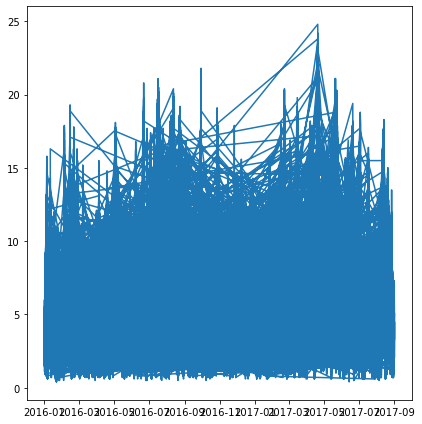

In [10]:
plt.rc('font', size=10) 
fig1,axs1 = plt.subplots(1,1,figsize = (6,6))
axs1.plot(InputData.Timestamp[InputData.Turbine_ID=='T01'],InputData.Amb_WindSpeed_Avg[InputData.Turbine_ID=='T01'])
plt.tight_layout()             
plt.show()

Obviously, the data aren't sorted! Now the index we have generated will help us out to sort the dataframe according to the date.

In [11]:
InputData.sort_index(axis=0,level = 1,ascending = True, inplace = True)
InputData.head()

Turbine_ID                 Timestamp  \
Turbine_ID Timestamp                                                        
T01        2016-01-01 00:00:00+00:00        T01 2016-01-01 00:00:00+00:00   
T06        2016-01-01 00:00:00+00:00        T06 2016-01-01 00:00:00+00:00   
T07        2016-01-01 00:00:00+00:00        T07 2016-01-01 00:00:00+00:00   
T09        2016-01-01 00:00:00+00:00        T09 2016-01-01 00:00:00+00:00   
T11        2016-01-01 00:00:00+00:00        T11 2016-01-01 00:00:00+00:00   

                                      Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
Turbine_ID Timestamp                                                          
T01        2016-01-01 00:00:00+00:00       1277.4       1226.1       1249.0   
T06        2016-01-01 00:00:00+00:00       1270.0       1232.8       1248.5   
T07        2016-01-01 00:00:00+00:00       1317.5       1229.5       1254.9   
T09        2016-01-01 00:00:00+00:00       1376.7       1234.3       1272.0   
T11        2016-01-01 00:00:00+00:00       1339.4       1233.3       1270.9   

                                      Gen_RPM_Std  Gen_Bear_Temp_Avg  \
Turbine_ID Timestamp                                                   
T01        2016-01-01 00:00:00+00:00          9.0               41.0   
T06        2016-01-01 00:00:00+00:00          6.8               42.0   
T07        2016-01-01 00:00:00+00:00         13.8               41.0   
T09        2016-01-01 00:00:00+00:00         24.7               40.0   
T11        2016-01-01 00:00:00+00:00         18.8               42.0   

                                      Gen_Phase1_Temp_Avg  \
Turbine_ID Timestamp                                        
T01        2016-01-01 00:00:00+00:00                   58   
T06        2016-01-01 00:00:00+00:00                   51   
T07        2016-01-01 00:00:00+00:00                   62   
T09        2016-01-01 00:00:00+00:00                   58   
T11        2016-01-01 00:00:00+00:00                   59   

                                      Gen_Phase2_Temp_Avg  \
Turbine_ID Timestamp                                        
T01        2016-01-01 00:00:00+00:00                   59   
T06        2016-01-01 00:00:00+00:00                   52   
T07        2016-01-01 00:00:00+00:00                   62   
T09        2016-01-01 00:00:00+00:00                   57   
T11        2016-01-01 00:00:00+00:00                   61   

                                      Gen_Phase3_Temp_Avg  ...  \
Turbine_ID Timestamp                                       ...   
T01        2016-01-01 00:00:00+00:00                   58  ...   
T06        2016-01-01 00:00:00+00:00                   53  ...   
T07        2016-01-01 00:00:00+00:00                   61  ...   
T09        2016-01-01 00:00:00+00:00                   58  ...   
T11        2016-01-01 00:00:00+00:00                   60  ...   

                                      Grd_Prod_PsbleInd_Max  \
Turbine_ID Timestamp                                          
T01        2016-01-01 00:00:00+00:00                    0.0   
T06        2016-01-01 00:00:00+00:00                    0.0   
T07        2016-01-01 00:00:00+00:00                    0.0   
T09        2016-01-01 00:00:00+00:00                 -224.5   
T11        2016-01-01 00:00:00+00:00                 -752.6   

                                      Grd_Prod_PsbleInd_Min  \
Turbine_ID Timestamp                                          
T01        2016-01-01 00:00:00+00:00                 -584.5   
T06        2016-01-01 00:00:00+00:00                 -880.6   
T07        2016-01-01 00:00:00+00:00                -1000.0   
T09        2016-01-01 00:00:00+00:00                -1000.0   
T11        2016-01-01 00:00:00+00:00                -1000.0   

                                      Grd_Prod_PsbleInd_Std  \
Turbine_ID Timestamp                                          
T01        2016-01-01 00:00:00+00:00                  157.1   
T06        2016-01-01 00:00:00+00:00          

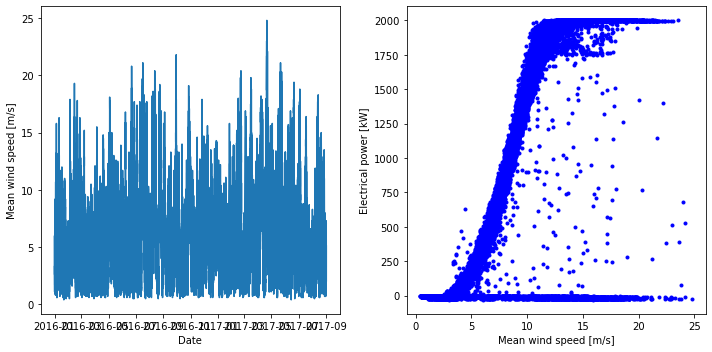

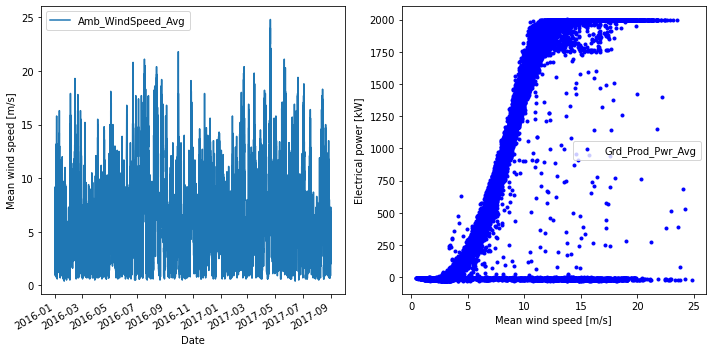

In [12]:
### using matplotlib only
plt.rc('font', size=10) 
fig2,axs2 = plt.subplots(1,2,figsize = (10,5))
axs2[0].plot(InputData.Timestamp[InputData.Turbine_ID=='T01'],InputData.Amb_WindSpeed_Avg[InputData.Turbine_ID=='T01'])
plt.setp(axs2[0], xlabel = 'Date', ylabel = 'Mean wind speed [m/s]')
axs2[1].plot(InputData.Amb_WindSpeed_Avg[InputData.Turbine_ID=='T01'],InputData.Grd_Prod_Pwr_Avg[InputData.Turbine_ID=='T01'],'.b')
plt.setp(axs2[1], xlabel = 'Mean wind speed [m/s]', ylabel = 'Electrical power [kW]')
plt.tight_layout()             
plt.show()

### or with pandas plot directly 
fig_pd,axs_pd = plt.subplots(1,2,figsize = (10,5))
InputData.xs('T01',level=0).plot(ax=axs_pd[0], y='Amb_WindSpeed_Avg')
plt.setp(axs_pd[0], xlabel = 'Date', ylabel = 'Mean wind speed [m/s]')
InputData.xs('T01',level=0).plot(ax=axs_pd[1], x='Amb_WindSpeed_Avg', y='Grd_Prod_Pwr_Avg', style='.b')
plt.setp(axs_pd[1], xlabel = 'Mean wind speed [m/s]', ylabel = 'Electrical power [kW]')
plt.tight_layout()             
plt.show()

Now the sorting looks better but it is also obvious that the data may need filtering as there are some data points where there is no normal production. So let us make some more overview plots. We will now also make use of the second index we created in the data frame, corresponding to turbine names, so that we can easily select data from one turbine at a time. The same procedure could also be carried out using a boolean mask as shown in the cell below:

In [17]:
T01mask = InputData.Turbine_ID == 'T01'

MaxPowerMask = InputData.Grd_Prod_Pwr_Max >= 1
MinPowerMask = InputData.Grd_Prod_Pwr_Min <= 1
MinRPMMask = InputData.Gen_RPM_Min >= 1150
MaxRPMMask = InputData.Gen_RPM_Max >= 1250

OperationalMask = MinRPMMask & ~MinPowerMask
TransientMask = MaxPowerMask & MaxRPMMask & ~OperationalMask
IdlingMask = ~OperationalMask & ~TransientMask

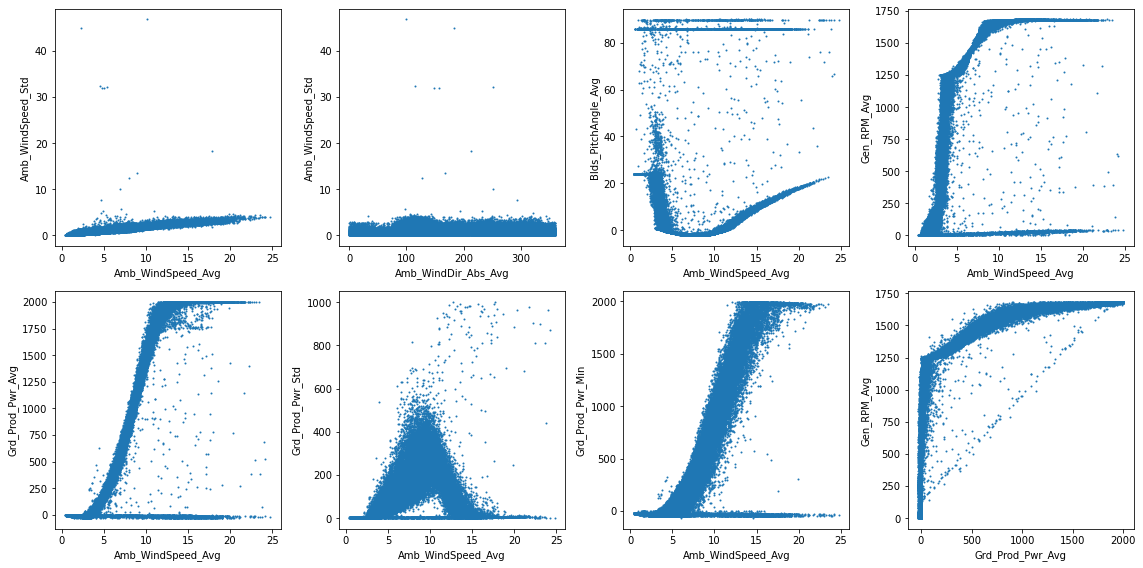

In [14]:
plt.rc('font', size=10) 
fig3 = plt.figure(figsize = (16,8))
fig3.add_subplot(2,4,1)
plt.plot(InputData.Amb_WindSpeed_Avg['T01'],InputData.Amb_WindSpeed_Std[T01mask],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,2)
plt.plot(InputData.Amb_WindDir_Abs_Avg['T01'],InputData.Amb_WindSpeed_Std['T01'],'.',markersize = 2)
plt.xlabel('Amb_WindDir_Abs_Avg')
plt.ylabel('Amb_WindSpeed_Std')
fig3.add_subplot(2,4,3)
plt.plot(InputData.Amb_WindSpeed_Avg['T01'],InputData.Blds_PitchAngle_Avg['T01'],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Blds_PitchAngle_Avg')
fig3.add_subplot(2,4,4)
plt.plot(InputData.Amb_WindSpeed_Avg['T01'],InputData.Gen_RPM_Avg['T01'],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Gen_RPM_Avg')
fig3.add_subplot(2,4,5)
plt.plot(InputData.Amb_WindSpeed_Avg['T01'],InputData.Grd_Prod_Pwr_Avg['T01'],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
fig3.add_subplot(2,4,6)
plt.plot(InputData.Amb_WindSpeed_Avg['T01'],InputData.Grd_Prod_Pwr_Std['T01'],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Std')
fig3.add_subplot(2,4,7)
plt.plot(InputData.Amb_WindSpeed_Avg['T01'],InputData.Grd_Prod_Pwr_Min['T01'],'.',markersize = 2)
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Min')
fig3.add_subplot(2,4,8)
plt.plot(InputData.Grd_Prod_Pwr_Avg['T01'],InputData.Gen_RPM_Avg['T01'],'.',markersize = 2)
plt.xlabel('Grd_Prod_Pwr_Avg')
plt.ylabel('Gen_RPM_Avg')


plt.tight_layout()             
plt.show()

In [18]:
TurbineOK = InputData.Status_Flag==0
TurbineTransient = InputData.Status_Flag == 1
TurbineIdling = InputData.Status_Flag == 2

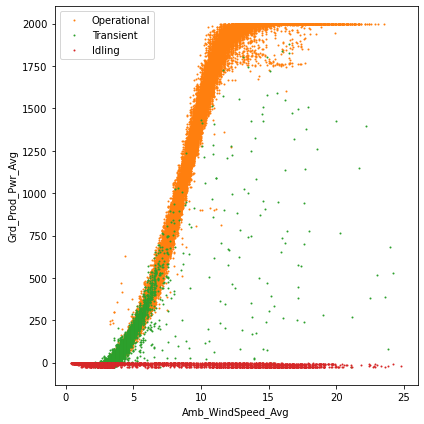

In [19]:
# Plot the power curve for different status flags
T01mask = InputData.Turbine_ID == 'T01'
fig4 = plt.figure(figsize = (6,6))
plt.plot(InputData.Amb_WindSpeed_Avg[TurbineOK & T01mask],InputData.Grd_Prod_Pwr_Avg[TurbineOK & T01mask],'.',markersize = 2, color = 'C1')
plt.plot(InputData.Amb_WindSpeed_Avg[TurbineTransient & T01mask],InputData.Grd_Prod_Pwr_Avg[TurbineTransient & T01mask],'.',markersize = 2, color = 'C2')
plt.plot(InputData.Amb_WindSpeed_Avg[TurbineIdling & T01mask],InputData.Grd_Prod_Pwr_Avg[TurbineIdling & T01mask],'.',markersize = 2, color = 'C3')
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
plt.legend(['Operational','Transient','Idling'])
plt.tight_layout()             
plt.show()

### 2.2 Feature list

In [18]:
ChannelList = ['Amb_WindSpeed','Grd_Prod_Pwr','Gen_RPM','Blds_PitchAngle']
StatsList = ['Avg','Std','Min','Max']
Nfeatures = len(ChannelList)*len(StatsList)
nsamples = InputData.index.shape[0]
FeatureList = pd.DataFrame()

for i in ChannelList:
    for j in StatsList:
        FeatureListName = i + '_' + j
        FeatureList[FeatureListName] = InputData[FeatureListName]        
        
FeatureList

Amb_WindSpeed_Avg  Amb_WindSpeed_Std  \
Turbine_ID Timestamp                                                         
T01        2016-01-01 00:00:00+00:00                3.3                0.9   
T06        2016-01-01 00:00:00+00:00                3.8                0.6   
T07        2016-01-01 00:00:00+00:00                4.1                1.1   
T09        2016-01-01 00:00:00+00:00                5.2                0.9   
T11        2016-01-01 00:00:00+00:00                5.3                0.7   
...                                                 ...                ...   
T01        2017-09-01 00:00:00+00:00                5.1                0.9   
T06        2017-09-01 00:00:00+00:00                4.7                0.8   
T07        2017-09-01 00:00:00+00:00                5.2                0.7   
T09        2017-09-01 00:00:00+00:00                5.3                0.6   
T11        2017-09-01 00:00:00+00:00                4.9                0.5   

                                      Amb_WindSpeed_Min  Amb_WindSpeed_Max  \
Turbine_ID Timestamp                                                         
T01        2016-01-01 00:00:00+00:00                0.5               11.6   
T06        2016-01-01 00:00:00+00:00                1.6                6.0   
T07        2016-01-01 00:00:00+00:00                0.9               14.4   
T09        2016-01-01 00:00:00+00:00                1.8                9.9   
T11        2016-01-01 00:00:00+00:00                2.6                8.6   
...                                                 ...                ...   
T01        2017-09-01 00:00:00+00:00                2.7                8.7   
T06        2017-09-01 00:00:00+00:00                2.4                7.9   
T07        2017-09-01 00:00:00+00:00                2.5                8.1   
T09        2017-09-01 00:00:00+00:00                2.6                8.3   
T11        2017-09-01 00:00:00+00:00                3.2                7.3   

                                      Grd_Prod_Pwr_Avg  Grd_Prod_Pwr_Std  \
Turbine_ID Timestamp                                                       
T01        2016-01-01 00:00:00+00:00              26.2              35.3   
T06        2016-01-01 00:00:00+00:00              62.5              36.9   
T07        2016-01-01 00:00:00+00:00             112.7              75.2   
T09        2016-01-01 00:00:00+00:00             198.4              61.0   
T11        2016-01-01 00:00:00+00:00             246.1              51.8   
...                                                ...               ...   
T01        2017-09-01 00:00:00+00:00             183.9              61.4   
T06        2017-09-01 00:00:00+00:00             163.8              75.6   
T07        2017-09-01 00:00:00+00:00             222.0              44.3   
T09        2017-09-01 00:00:00+00:00             188.2              31.7   
T11        2017-09-01 00:00:00+00:00             177.6              24.3   

                                      Grd_Prod_Pwr_Min  Grd_Prod_Pwr_Max  \
Turbine_ID Timestamp                                                       
T01        2016-01-01 00:00:00+00:00             -33.5             118.4   
T06        2016-01-01 00:00:00+00:00             -17.8             178.4   
T07        2016-01-01 00:00:00+00:00             -11.5             277.3   
T09        2016-01-01 00:00:00+00:00              46.0             349.0   
T11        2016-01-01 00:00:00+00:00             154.1             368.9   
...                                                ...               ...   
T01        2017-09-01 00:00:00+00:00              61.6             309.3   
T06        2017-09-01 00:00:00+00:00              37.4             314.7   
T07        2017-09-01 00:00:00+00:00             151.7             340.9   
T09        2017-09-01 00:00:00+00:00              63.1             250.0   
T11        2017-09-01 00:00:00+00:00             108.0             230.6   

                              

In [19]:
TargetClasses = InputData.Status_Flag
TargetClasses

Turbine_ID  Timestamp                
T01         2016-01-01 00:00:00+00:00    1.0
T06         2016-01-01 00:00:00+00:00    1.0
T07         2016-01-01 00:00:00+00:00    1.0
T09         2016-01-01 00:00:00+00:00    0.0
T11         2016-01-01 00:00:00+00:00    0.0
                                        ... 
T01         2017-09-01 00:00:00+00:00    0.0
T06         2017-09-01 00:00:00+00:00    0.0
T07         2017-09-01 00:00:00+00:00    0.0
T09         2017-09-01 00:00:00+00:00    0.0
T11         2017-09-01 00:00:00+00:00    0.0
Name: Status_Flag, Length: 434145, dtype: float64

### 2.3 Model training

In [20]:
import sklearn
import sklearn.neural_network
import sklearn.ensemble

In [21]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(FeatureList, TargetClasses, 
                                                                            random_state=0, shuffle = True, test_size = 0.1)

In [22]:
RandFmodel = sklearn.ensemble.RandomForestClassifier(n_estimators = 100, bootstrap = True, verbose = True)
ANNmodel = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (12,12), 
                                                activation = 'relu', 
                                                max_iter = 1000, 
                                                verbose = True, 
                                                learning_rate_init = 0.05, 
                                                batch_size = nsamples)
ANNmodel.get_params

<bound method BaseEstimator.get_params of MLPClassifier(batch_size=434145, hidden_layer_sizes=(12, 12),
              learning_rate_init=0.05, max_iter=1000, verbose=True)>

In [23]:
RandFmodel.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   34.1s finished


RandomForestClassifier(verbose=True)

In [24]:
y_pred_rf = RandFmodel.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [25]:
RandFmodel.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


1.0

array([<AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>,
       <AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>],
      dtype=object)

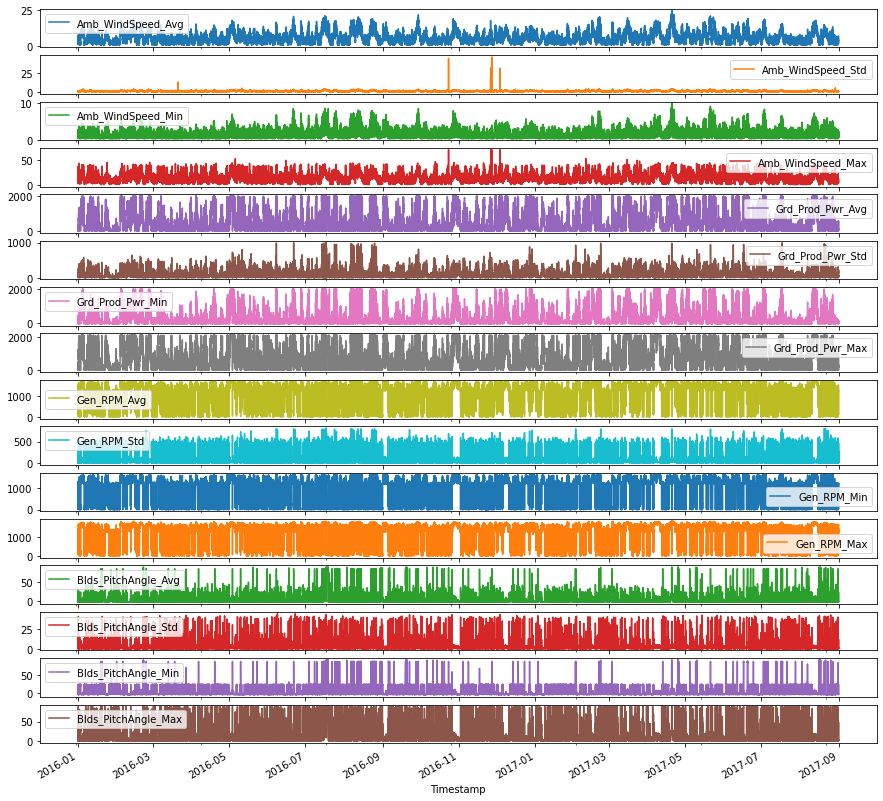

In [26]:
X_train.xs('T01',level=0).plot(subplots=True, figsize=(15,15))

array([<AxesSubplot:xlabel='Timestamp'>], dtype=object)

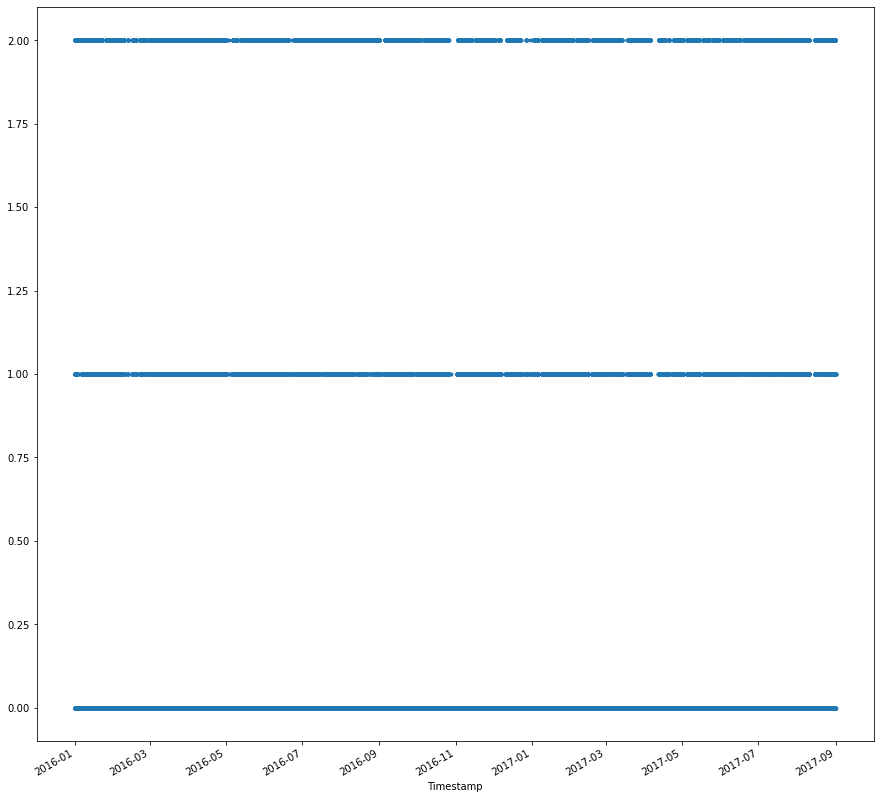

In [27]:
y_train.xs('T01',level=0).plot(subplots=True, figsize=(15,15), style='.')

In [28]:
ANNmodel.fit(X_train,y_train)

C:\Users\nkdi\Anaconda3\envs\data-science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:353: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Iteration 1, loss = 26.26713750
Iteration 2, loss = 11.78084335
Iteration 3, loss = 11.76022606
Iteration 4, loss = 11.49519861
Iteration 5, loss = 10.99249324
Iteration 6, loss = 9.85953785
Iteration 7, loss = 5.95736240
Iteration 8, loss = 2.76138954
Iteration 9, loss = 9.19017392
Iteration 10, loss = 6.68902773
Iteration 11, loss = 1.64179016
Iteration 12, loss = 0.89965134
Iteration 13, loss = 0.94752273
Iteration 14, loss = 0.89189234
Iteration 15, loss = 0.85724317
Iteration 16, loss = 0.84862400
Iteration 17, loss = 0.84559063
Iteration 18, loss = 0.84328759
Iteration 19, loss = 0.83835481
Iteration 20, loss = 0.83121290
Iteration 21, loss = 0.82150193
Iteration 22, loss = 0.80929961
Iteration 23, loss = 0.79468107
Iteration 24, loss = 0.77849699
Iteration 25, loss = 0.76152142
Iteration 26, loss = 0.74373502
Iteration 27, loss = 0.72520547
Iteration 28, loss = 0.70648996
Iteration 29, loss = 0.68776320
Iteration 30, loss = 0.66923426
Iteration 31, loss = 0.65108775
Iteration 32

MLPClassifier(batch_size=434145, hidden_layer_sizes=(12, 12),
              learning_rate_init=0.05, max_iter=1000, verbose=True)

In [29]:
y_pred_ann = ANNmodel.predict(X_test)
ANNmodel.score(X_test,y_test)

0.8492917194518024

We see that the ANN model preforms less optimally than the random forest model. Could it be due to the way we've implemented the model? 

While for the random forest model the scales of different variables have no specific meaning, for the neural networks the scaling of data may be of importance due to the specific range of the activation functions. Let us try to use scaling on the input variables so that they get zero mean and unit variance, and see if this improves the ANN model performance.

In [30]:
Xscaler = sklearn.preprocessing.StandardScaler() # Scaling object
X_train_scaled = Xscaler.fit_transform(X_train) # fit the scales and apply
ANNmodel.fit(X_train_scaled,y_train)

C:\Users\nkdi\Anaconda3\envs\data-science\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:353: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn("Got `batch_size` less than 1 or larger than "


Iteration 1, loss = 1.47102181
Iteration 2, loss = 0.73481732
Iteration 3, loss = 0.42130951
Iteration 4, loss = 0.31245662
Iteration 5, loss = 0.32503584
Iteration 6, loss = 0.34037462
Iteration 7, loss = 0.32084140
Iteration 8, loss = 0.27905303
Iteration 9, loss = 0.23922457
Iteration 10, loss = 0.21276476
Iteration 11, loss = 0.19697654
Iteration 12, loss = 0.18525134
Iteration 13, loss = 0.17574825
Iteration 14, loss = 0.16825916
Iteration 15, loss = 0.16097876
Iteration 16, loss = 0.15238066
Iteration 17, loss = 0.14423574
Iteration 18, loss = 0.14036798
Iteration 19, loss = 0.13832673
Iteration 20, loss = 0.13223590
Iteration 21, loss = 0.12809622
Iteration 22, loss = 0.12644207
Iteration 23, loss = 0.12371649
Iteration 24, loss = 0.11997861
Iteration 25, loss = 0.11788472
Iteration 26, loss = 0.11569967
Iteration 27, loss = 0.11032577
Iteration 28, loss = 0.10612053
Iteration 29, loss = 0.10333310
Iteration 30, loss = 0.10068272
Iteration 31, loss = 0.09919068
Iteration 32, los

MLPClassifier(batch_size=434145, hidden_layer_sizes=(12, 12),
              learning_rate_init=0.05, max_iter=1000, verbose=True)

In [31]:
y_pred_ann = ANNmodel.predict(Xscaler.transform(X_test))
ANNmodel.score(Xscaler.transform(X_test),y_test)

0.99051019232984

Did the performance improve? For neural network models, it is typically necessary to scale the input data, and if we are working with a regression model, the output data may also require scaling.

### 2.4 Model evaluation - plotting results and confusion matrix

In [32]:
# %load plot_confusion_matrix.py
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues, 
                          fig=None, ax=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[sklearn.utils.multiclass.unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    if not ax:
        fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
                
    fig.tight_layout()
    return ax


Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Normalized confusion matrix
[[0.99330447 0.00669553 0.        ]
 [0.02371481 0.9752142  0.00107099]
 [0.         0.00695317 0.99304683]]


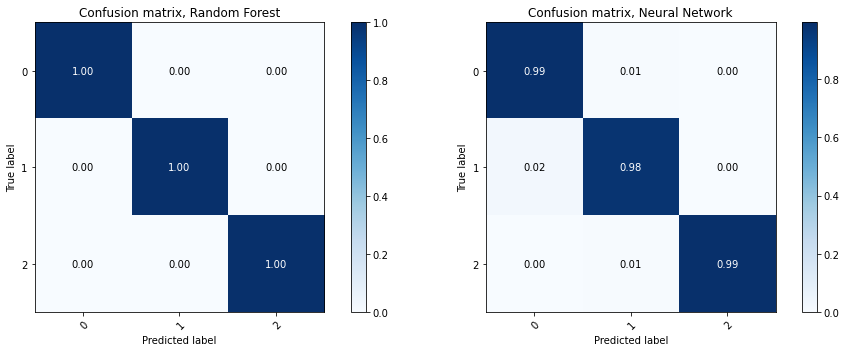

In [33]:
fig5,axs5 = plt.subplots(1,2, figsize = (14,5))
plot_confusion_matrix(y_test, y_pred_rf, classes=[0,1,2],
                      normalize = True,
                      title='Confusion matrix, Random Forest',cmap=plt.cm.Blues,fig = fig5,ax = axs5[0])
plot_confusion_matrix(y_test, y_pred_ann, classes=[0,1,2],
                      normalize = True,
                      title='Confusion matrix, Neural Network',cmap=plt.cm.Blues,fig = fig5,ax = axs5[1])
plt.show()

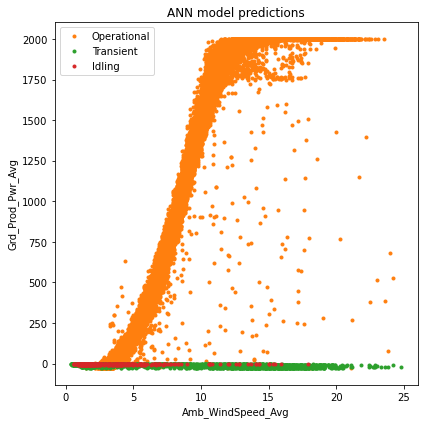

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished


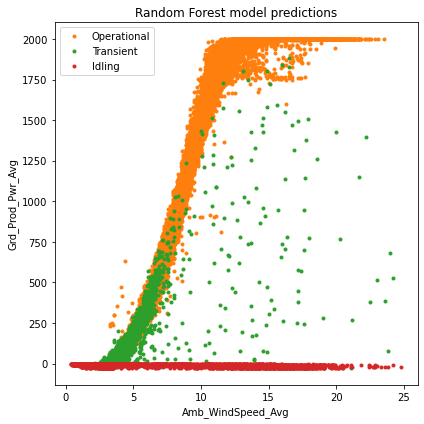

In [34]:
# Plot the power curve for different status flags from predicting model
y_ann = ANNmodel.predict(FeatureList)
T01mask = InputData.Turbine_ID == 'T01'
ANN_operational = y_ann == 0
ANN_transient = y_ann == 1
ANN_idling = y_ann == 2
fig6 = plt.figure(figsize = (6,6))
plt.plot(FeatureList.Amb_WindSpeed_Avg[T01mask & ANN_operational],FeatureList.Grd_Prod_Pwr_Avg[T01mask & ANN_operational],'o',markersize = 3,color = 'C1')
plt.plot(FeatureList.Amb_WindSpeed_Avg[T01mask & ANN_transient],FeatureList.Grd_Prod_Pwr_Avg[T01mask & ANN_transient],'o',markersize = 3,color = 'C2')
plt.plot(FeatureList.Amb_WindSpeed_Avg[T01mask & ANN_idling],FeatureList.Grd_Prod_Pwr_Avg[T01mask & ANN_idling],'o',markersize = 3,color = 'C3')
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
plt.legend(['Operational','Transient','Idling'])
plt.title('ANN model predictions')
plt.tight_layout()             
plt.show()

y_ann = RandFmodel.predict(FeatureList)
T01mask = InputData.Turbine_ID == 'T01'
ANN_operational = y_ann == 0
ANN_transient = y_ann == 1
ANN_idling = y_ann == 2
fig6 = plt.figure(figsize = (6,6))
plt.plot(FeatureList.Amb_WindSpeed_Avg[T01mask & ANN_operational],FeatureList.Grd_Prod_Pwr_Avg[T01mask & ANN_operational],'o',markersize = 3,color = 'C1')
plt.plot(FeatureList.Amb_WindSpeed_Avg[T01mask & ANN_transient],FeatureList.Grd_Prod_Pwr_Avg[T01mask & ANN_transient],'o',markersize = 3,color = 'C2')
plt.plot(FeatureList.Amb_WindSpeed_Avg[T01mask & ANN_idling],FeatureList.Grd_Prod_Pwr_Avg[T01mask & ANN_idling],'o',markersize = 3,color = 'C3')
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
plt.legend(['Operational','Transient','Idling'])
plt.title('Random Forest model predictions')
plt.tight_layout()             
plt.show()

# Unsupervised learning - example
This is a self-study example. If your previous calculations have been successful you should be able to run the cells below and see the performance of a simple unsupervised learning algorithm (k-means clustering).

In [35]:
import sklearn.cluster

In [36]:
Kmeansmodel = sklearn.cluster.KMeans(n_clusters = 3).fit(X_train)

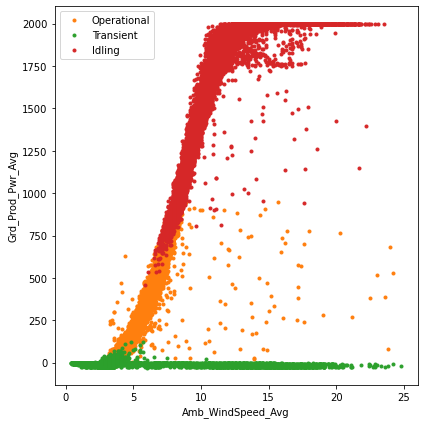

In [37]:
# Plot the power curve for different status flags from clustering-based model
y_kmeans = Kmeansmodel.predict(FeatureList)
T01mask = InputData.Turbine_ID == 'T01'
Kmeans_operational = y_kmeans == 0
Kmeans_transient = y_kmeans == 2
Kmeans_idling = y_kmeans == 1
fig7 = plt.figure(figsize = (6,6))
plt.plot(FeatureList.Amb_WindSpeed_Avg[T01mask & Kmeans_operational],FeatureList.Grd_Prod_Pwr_Avg[T01mask & Kmeans_operational],'o',markersize = 3, color = 'C1')
plt.plot(FeatureList.Amb_WindSpeed_Avg[T01mask & Kmeans_transient],FeatureList.Grd_Prod_Pwr_Avg[T01mask & Kmeans_transient],'o',markersize = 3, color = 'C2')
plt.plot(FeatureList.Amb_WindSpeed_Avg[T01mask & Kmeans_idling],FeatureList.Grd_Prod_Pwr_Avg[T01mask & Kmeans_idling],'o',markersize = 3, color = 'C3')
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
plt.legend(['Operational','Transient','Idling'])
plt.tight_layout()             
plt.show()

In [38]:
import sklearn.mixture

In [39]:
GM_model = sklearn.mixture.GaussianMixture (n_components=3).fit(X_train)

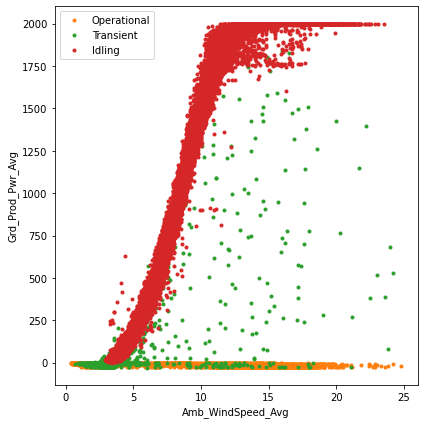

In [40]:
# Plot the power curve for different status flags from clustering-based model
y_GM = GM_model.predict(FeatureList)
T01mask = InputData.Turbine_ID == 'T01'
GMM_operational = y_GM == 2
GMM_transient = y_GM == 1
GMM_idling = y_GM == 0
fig7 = plt.figure(figsize = (6,6))
plt.plot(FeatureList.Amb_WindSpeed_Avg[T01mask & GMM_operational],FeatureList.Grd_Prod_Pwr_Avg[T01mask & GMM_operational],'o',markersize = 3, color = 'C1')
plt.plot(FeatureList.Amb_WindSpeed_Avg[T01mask & GMM_transient],FeatureList.Grd_Prod_Pwr_Avg[T01mask & GMM_transient],'o',markersize = 3, color = 'C2')
plt.plot(FeatureList.Amb_WindSpeed_Avg[T01mask & GMM_idling],FeatureList.Grd_Prod_Pwr_Avg[T01mask & GMM_idling],'o',markersize = 3, color = 'C3')
plt.xlabel('Amb_WindSpeed_Avg')
plt.ylabel('Grd_Prod_Pwr_Avg')
plt.legend(['Operational','Transient','Idling'])
plt.tight_layout()             
plt.show()

### Which clustering algorithm worked better? Can you think of reasons why?